In [3]:
%matplotlib widget

Forma original de los datos: (178, 13)


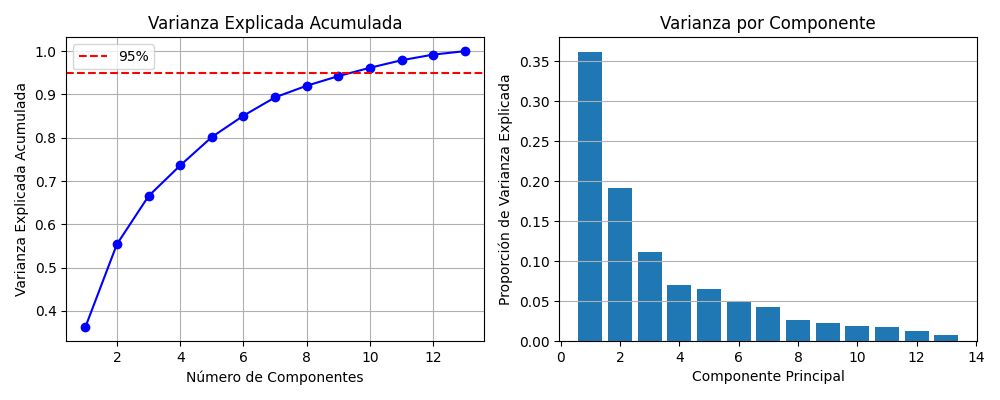


Varianza explicada con 2 componentes: 0.5540633835693526
Varianza explicada con 3 componentes: 0.6652996889318524


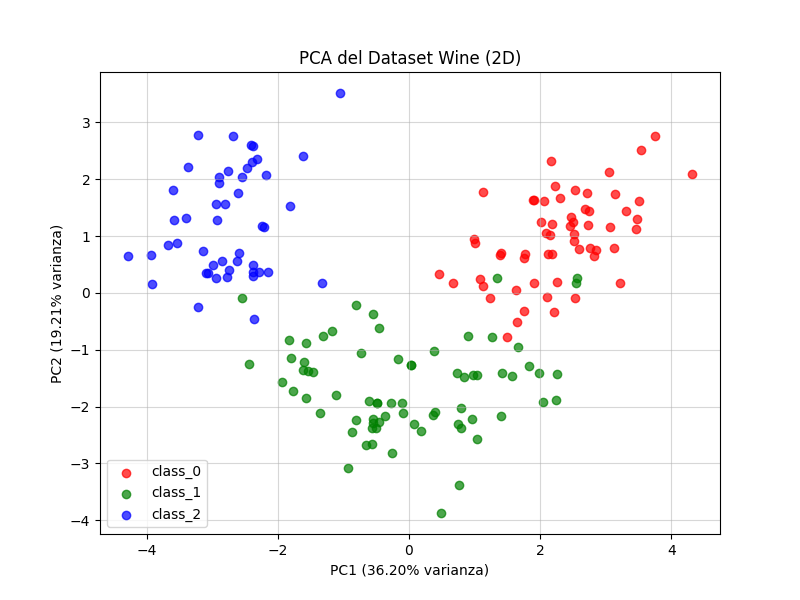

In [4]:
### Código Completo (Vino)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Cargar y preparar los datos
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names
print (f"Forma original de los datos: {X.shape}") # (178, 13)

# 2. Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
# Primero, exploremos la varianza explicada para decidir 'n_components'
pca_full = PCA()
pca_full.fit(X_scaled)

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 14), np.cumsum(pca_full.explained_variance_ratio_), 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(1, 14), pca_full.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza por Componente')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Para fines de visualización, usaremos 2 y 3 componentes.
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
X_pca_2d = pca_2d.fit_transform(X_scaled)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("\nVarianza explicada con 2 componentes:", pca_2d.explained_variance_ratio_.sum())
print("Varianza explicada con 3 componentes:", pca_3d.explained_variance_ratio_.sum())

# 4. Visualización en 2D
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter (
        X_pca_2d[y == i, 0],
        X_pca_2d[y == i, 1],
        c=color,
        label=target_names[i],
        alpha = 0.7
    )
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('PCA del Dataset Wine (2D)')
plt.legend()
plt.grid(True, linestyle='-', alpha = 0.5)
plt.show()
print()


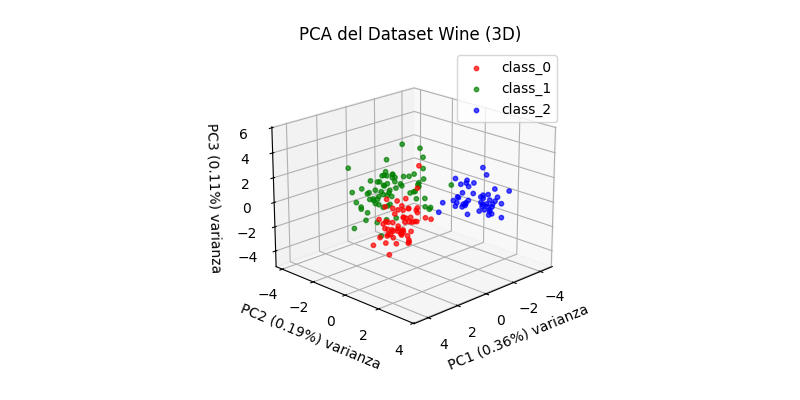

In [6]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate (colors):
    ax.scatter (
        X_pca_3d [y == i, 0],
        X_pca_3d [y==i, 1],
        X_pca_3d[y==i, 2],
        c=color, 
        label=target_names[i],
        alpha=0.7,
        s=10  
    )
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2f}%) varianza')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2f}%) varianza')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2f}%) varianza')
ax.set_title('PCA del Dataset Wine (3D)')
ax.legend()
# Ajustar el ángulo de vista para mejor
ax.view_init(elev=20, azim=45)
plt.show()